- by animal 
- by sex
- by day
- by experiment

- day + experiment
- animal + sex
- day + animal + sex
- experiment + animal + sex

In [109]:
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import scipy.stats as stats
import re
import seaborn as sns
import os

In [110]:
input_dir = "Results"

In [111]:

def get_number(s):
    match = re.search(r'(\d+)$', s)  # Only match number at end
    return int(match.group(1)) if match else None

def get_experiment_type(s):
    # Remove the trailing number (if any)
    return re.sub(r'[_\s-]?\d+$', '', s)

def get_animal_number(s):
    match = re.search(r'(\d+)', s)
    return int(match.group(1)) if match else None

In [112]:
files = [file for file in os.listdir(input_dir) if file.endswith(('.xlsx', '.xls'))]

dfs = []

for file in files:
    file_path = os.path.join(input_dir, file)
    df = pd.read_excel(file_path)  
    dfs.append(df)

print(f"Loaded {len(dfs)} result table(s).")

Loaded 2 result table(s).


In [113]:
for i, df in enumerate(dfs):
    df['has_number'] = df['experiment'].str.contains(r'\d+$')
    df['experiment_number'] = df['experiment'].apply(get_number)
    df['experiment_type'] = df['experiment'].apply(get_experiment_type)
    df['animal_number'] = df['animal'].apply(get_animal_number)

    df = df.sort_values(['animal_number', 'sex', 'date', 'has_number', 'experiment_type', 'experiment_number'])

    # Drop helper columns
    df = df.drop(columns=['has_number', 'experiment_type', 'experiment_number', 'animal_number'])

    # Reset index
    df = df.reset_index(drop=True)

    dfs[i] = df

In [114]:
def boxplot(x, y, index=0, rot=False):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=x, y=y, data=dfs[index])
    plt.title(f'Boxplot of {y} across {x}')
    if rot: plt.xticks(rotation=45)
    plt.show()

In [115]:
def stripplot(x, y, index=0, rot=False):
    plt.figure(figsize=(8, 6))
    
    # Average y per animal per x-category (e.g., one value per animal per experiment)
    data = dfs[index].groupby([x, 'animal'], as_index=False)[y].mean()
    
    sns.stripplot(x=x, y=y, data=data, jitter=True, dodge=True)
    plt.title(f'Stripplot of {y} across {x}')
    
    if rot:
        plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()


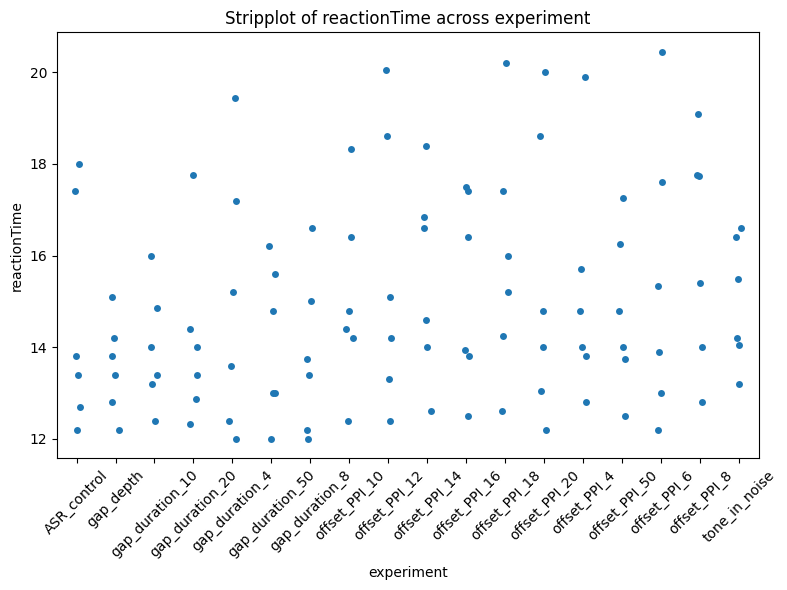

In [116]:
stripplot(x='experiment', y='reactionTime', index=0, rot=True)

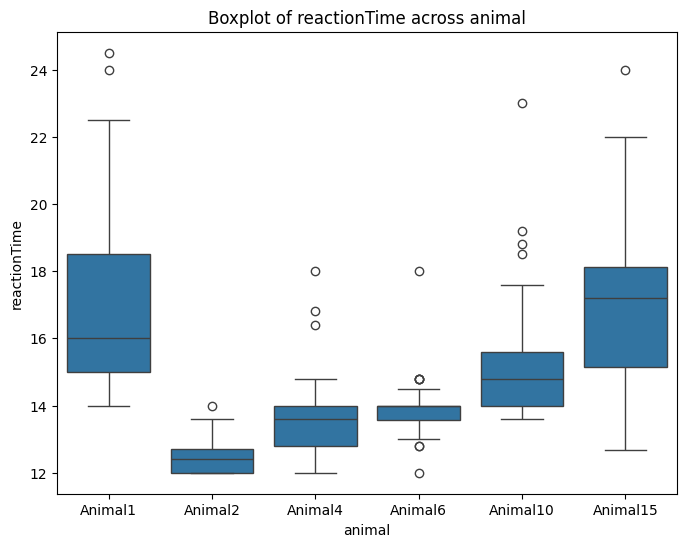

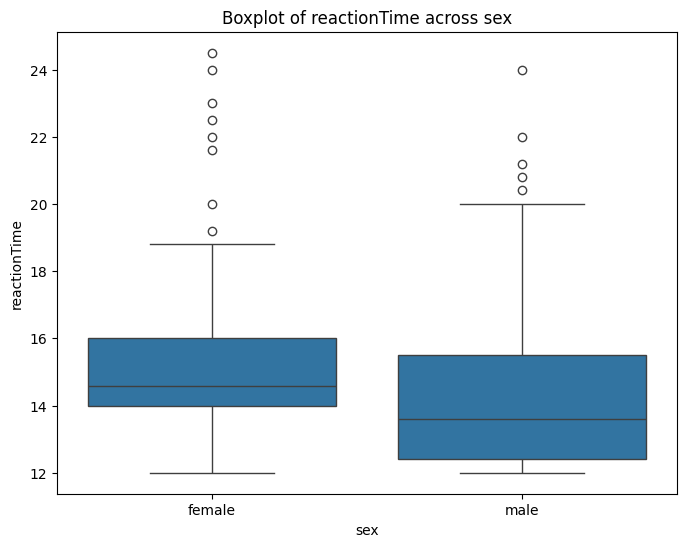

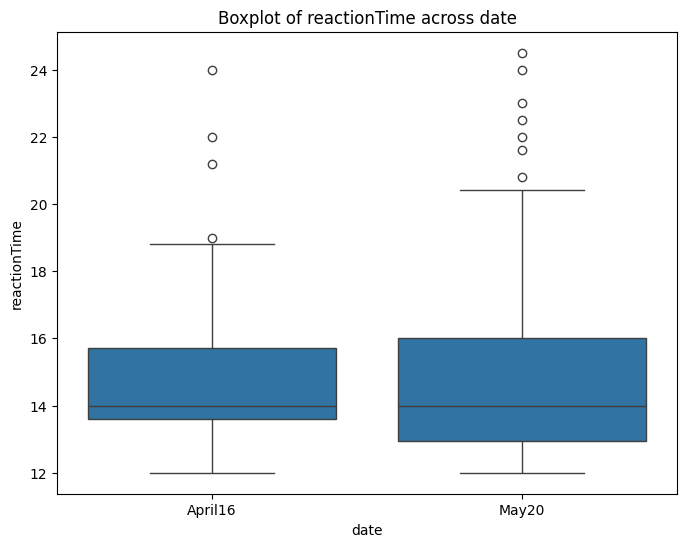

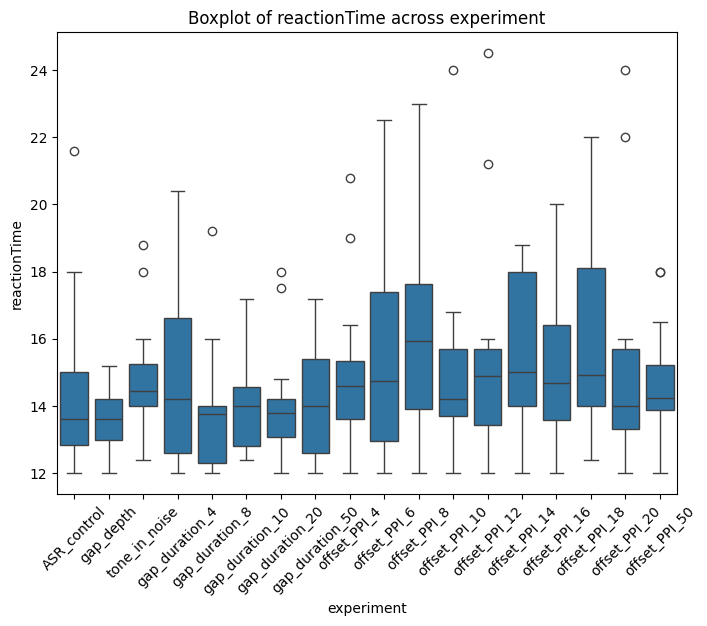

In [117]:
boxplot("animal", "reactionTime")
boxplot("sex", "reactionTime")
boxplot("date", "reactionTime")
boxplot("experiment", "reactionTime", rot=True)